# Perceptron--Single-Layer Neural Networks

## 1.Data visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


#### A total of 100 data points can be found by loading X and y in the data set.

In [2]:
import random


random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

#### According to the ratio of 4: 1, the training set and the test set are divided by random sampling.

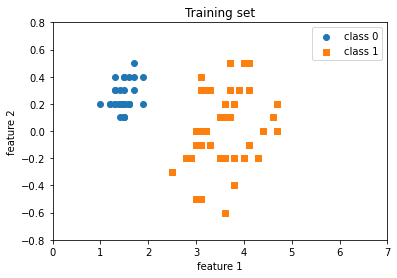

In [3]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()


#### Visualize the data points of the training set. The horizontal axis is feature 1 in X, and the vertical axis is feature 2 in X. y is distinguished by different category labels.
#### It can be seen that the data points of the two categories themselves have obvious boundaries in distribution, so it can be predicted that only a simple model can get good results.

## 2.Define the Perceptron

In [4]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features,1),dtype=np.float) # <your code>
        self.bias = np.zeros(1,dtype=np.float)# <your code>

    def forward(self, x):
        linear = np.dot(x,self.weights) + self.bias# <your code>
        prediction = np.where(linear > 0.,1,0)# <your code>
        return prediction
        
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors  
        # <your code> to compute the prediction error
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(len(y)):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features,1)
                self.bias += errors 

                # <your code> to update the weights and bias
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]
        # <your code> to compute the prediction accuracy       
        return accuracy

#### The Perceptron contains 5 modules：

#### 1. Initialization module: Initialize the feature number, weight and bias.

#### 2. forward module:The forward propagation module defines how the weighted sum is obtained, and how the weighted sum becomes the predicted value through the threshold function.

#### 3. backward module:The back propagation module defines the error between the predicted value and the true value, and the error plays a crucial role in updating the weights and bias in the training process.

#### 4. train module:The training module is exactly the training process after the data enters the model. In each iteration, forward propagation and back propagation are called, and the weights and bias are continuously updated through errors.

#### 5. evaluate module:The evaluation module obtains the score of the model by predicting the proportion of accurate data points in the total data points.

## 3.Training the model

In [5]:
ppn = Perceptron(num_features=2)

ppn.train(X_train,y_train,epochs=5)

print(' Weights: %s\n' % ppn.weights)
print(' Bias: %s\n' % ppn.bias)

 Weights: [[ 1.3]
 [-0.9]]

 Bias: [-3.]



In [6]:
train_acc = ppn.evaluate(X_train,y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

# <your code>
test_acc = ppn.evaluate(X_test,y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))


Train set accuracy: 100.00%
Test set accuracy: 100.00%


### As mentioned earlier, the internal data points of this data set are very distinct, so this model scores very high for this data set.

## 4. 2D Decision Boundary

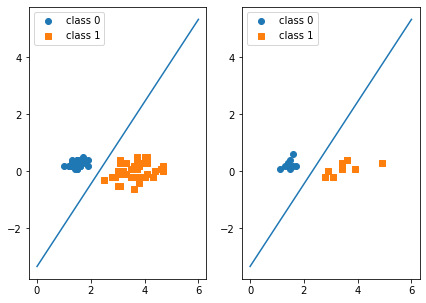

In [9]:
w = ppn.weights
b = ppn.bias

x_min = 0
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 6
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 5))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

#### For the drawing of the two-dimensional decision boundary, the scattered points need not be described in detail. The key is how the boundary is drawn?

#### It should be noted that the decision boundary is the attribute of the hypothetical function, determined by the parameters, not by the characteristics of the data set.
#### The logistic regression decision boundary is used here. Logistic regression assumes that the threshold function inside the function is a sigmoid function. According to its nature, it can be seen that the positive and negative of Z can just distinguish two types of data points, and when Z takes 0, the function The value corresponds to 0.5, which happens to be the limit of the data points.

#### Corresponding to this problem is that the value (weighted sum) of w1x1 + w2x2 + b is 0. With this judgment condition, we can draw the function image.
#### The specific method is that because the boundary is linear, two points are needed to determine this polyline. In order to allow all data points to be distinguished, Xmax and Xmin are taken separately, and then the expression of Y can be deformed according to the above formula Obtained, it should be noted that X and Y here correspond to feature 1 and feature 2, so this approach is to convert the above formula into the relationship between the two features. Among them, w and b are used for the last update, which has been obtained in the previous step.
#### With these parameters, we can determine the decision boundary of the data set.